In [31]:
import pandas as pd
import numpy as np
filepath = '../ready_trader_one/data/day3.csv'
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
with open(filepath, "r") as file:
    data = pd.read_csv(filepath)

In [36]:
data.head()

,Time,Instrument,Operation,OrderId,Side,Volume,Price,Lifespan
0,0.0,0,Insert,1238001,A,200.0,3470.0,GFD
1,0.0,0,Insert,1237795,B,300.0,3459.0,GFD
2,0.0,0,Insert,1238020,A,100.0,3459.0,GFD
3,0.0,0,Insert,1238020,A,100.0,3459.0,GFD
4,0.0,0,Insert,1237876,B,200.0,3457.0,GFD


In [146]:
def get_order_book(data, instrument, l_time, r_time, top_5 = False):
    """Visualise order book for given time"""
    new_data = data.query(f"Instrument == {instrument}")
    new_data = new_data[(new_data['Time'] <= r_time) & (new_data['Time'] >= l_time)].sort_values(["Side", "Price"])[["Side", "Price", "Volume"]]
    new_data = new_data.groupby(["Side", "Price"]).sum().reset_index()
    
    def group_filter(g):
        return g.tail() if g.name == "A" else g.head()
    
    if top_5:
        new_data = new_data.groupby(["Side"]).apply(lambda g: group_filter(g))
    return new_data.reset_index(drop=True)

In [159]:
# 3519
get_order_book(data, 0, 0.1, 0.2, True)

,Side,Price,Volume
0,A,3461.0,500.0
1,A,3476.0,1400.0


In [198]:
def visualise_order_book(data, instrument, l_time, r_time, tick_size):
    # For each tick_size: fetch order book
    time_ints = range(0, round((r_time - l_time) / tick_size))
    
    all_candlestick_data = pd.DataFrame(columns=["Max", "Open", "Close"])
    best = pd.DataFrame()
    for t in time_ints:
        # Candlestick b/t [t, t+ticksize
        order_book = get_order_book(data, instrument, l_time + t*tick_size, l_time+ (t+1) * tick_size, True)         
        
        best_ask = pd.DataFrame(columns=["Side", "Price", "Volume", 'Time'])
        best_bid = pd.DataFrame(columns=["Side", "Price", "Volume", 'Time'])
        
        
        if len(order_book):
            # Highest bid, lowest ask
            best_ask = order_book.query("Side == 'A'")[["Side", "Price", "Volume"]].sort_values("Price", ascending=True).head(1)
            best_bid = order_book.query("Side == 'B'")[["Side", "Price", "Volume"]].sort_values("Price", ascending=True).tail(1)
            best_ask["Time"] = l_time + t*tick_size
            best_bid["Time"] = l_time + t*tick_size

            if not len(best_ask):
                best_ask.loc[0, "Side"] = "A"
            if not len(best_bid):
                best_bid.loc[0, "Side"] = "B"
        else:
            best_ask.loc[0, "Side"] = "A"
            best_bid.loc[0, "Side"] = "B"
            best_ask.loc[0, "Time"] = l_time + t*tick_size
            best_bid.loc[0, "Time"] = l_time + t*tick_size
        
        best = best.append(best_ask)
        best = best.append(best_bid)
    
    return best.reset_index(drop=True)
        

In [196]:
def candlestick(data, data, instrument, l_time, r_time, top_5 = False):
    candle = pd.DataFrame(columns=["Min", "Max", "Open", "Close"])
    
    

SyntaxError: duplicate argument 'data' in function definition (<ipython-input-196-6677639959f4>, line 4)

In [199]:
v_0 = visualise_order_book(data, 0, 0, 0.7, 0.1)
v_1 = visualise_order_book(data, 1, 0, 0.7, 0.1)
pd.concat([v_0, v_1], axis=1)

,Side,Price,Volume,Time,Side,Price,Volume,Time
0,A,3685,100,0,A,3464,100,0
1,B,2809,100,0,B,3453,100,0
2,A,3461,500,0.1,A,3464,100,0.1
3,B,NaN,NaN,NaN,B,3453,100,0.1
4,A,3460,4600,0.2,A,3452,5,0.2
5,B,3459,11600,0.2,B,NaN,NaN,NaN
6,A,3459,900,0.3,A,NaN,NaN,NaN
7,B,3457,100,0.3,B,3459,10,0.3
8,A,3459,400,0.4,A,3450,1,0.4
9,B,3458,100,0.4,B,NaN,NaN,NaN


In [200]:
plt.scatter(v_0, 

TypeError: scatter() missing 1 required positional argument: 'y'

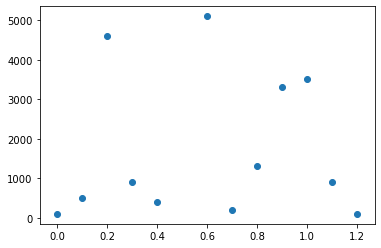

In [207]:
plt.scatter(x="Time",y="Volume", data=v_0.query("Side == 'A'"))

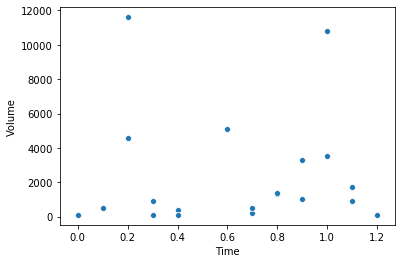

In [211]:
sns.scatterplot(x="Time", y="Volume", data=v_0)